# Visualizing Data

#### Data visualization has gained even more importance today. Data visualization provides insights which one might not get from  numerical analysis

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#os.chdir("/Users/Dippies/CODE PACKT - EML/Chapter 1")
os.getcwd()

housepricesdata = pd.read_csv("HousePrices.csv")

In [3]:
housepricesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
missing= housepricesdata.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
sorted(housepricesdata.columns[housepricesdata.isnull().any()])

['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Electrical',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'PoolQC']

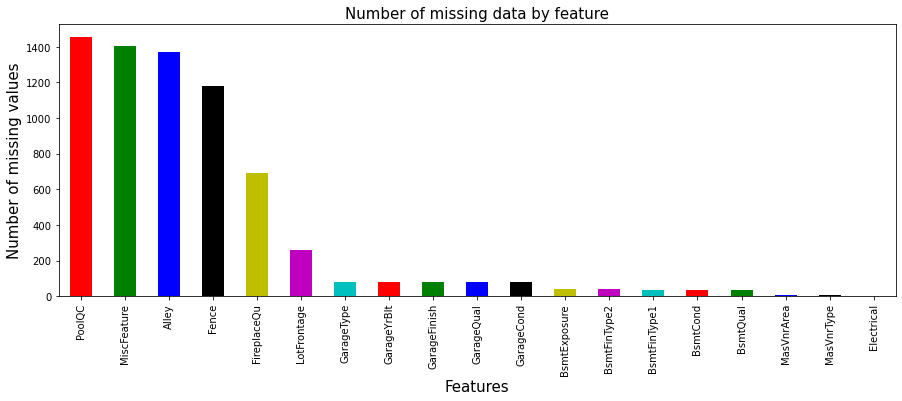

In [7]:
# Plot missing values
plt.figure(figsize=(15,5))
my_colors = list('rgbkymc')  #red, green, blue, black, etc.
#missing.plot(kind="bar",color=['r', 'g', 'b', 'y', 'm', 'c'])
missing.plot(kind="bar",color=my_colors)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)


plt.show()

In [7]:
# Setting options to display all rows and columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None

### Treat Missing Values and Perform Type Casting

In [9]:
# Using astype() to cast a pandas object to a specified datatype
housepricesdata['MSSubClass'] = housepricesdata['MSSubClass'].astype('category')
housepricesdata['MSSubClass'] = housepricesdata['OverallQual'].astype('category')
housepricesdata['MSSubClass'] = housepricesdata['OverallCond'].astype('category')

In [10]:
housepricesdata.dtypes

Id                  int64
MSSubClass       category
MSZoning           object
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition      object
SalePrice           int64
Length: 81, dtype: object

In [10]:
housepricesdata.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

# Replacing all NA values for FirePlaceQu with NF indicating "No fire place"
housepricesdata['FireplaceQu'].fillna('NF', inplace=True)

housepricesdata['LotFrontage'].fillna(housepricesdata['LotFrontage'].median(), inplace=True)

# Remove rows where GarageType, GarageFinish, GarageQual, 
# GarageCond, GarageYrBlt, GarageFinish are all Null
housepricesdata.drop(housepricesdata[housepricesdata['GarageType'].isnull()].index, inplace=True)

# We do the same for MasVnrType & MasVnrArea where both are null for the same rows
housepricesdata.drop(housepricesdata[housepricesdata['MasVnrArea'].isnull()].index, inplace=True)

# We also remove a few more rows where BsmtFinType2 have null values
housepricesdata.drop(housepricesdata[housepricesdata['BsmtFinType2'].isnull()].index, inplace=True)
housepricesdata.drop(housepricesdata[housepricesdata['BsmtExposure'].isnull()].index, inplace=True)

housepricesdata.drop(housepricesdata[housepricesdata['Electrical'].isnull()].index, inplace=True)

In [11]:
housepricesdata.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

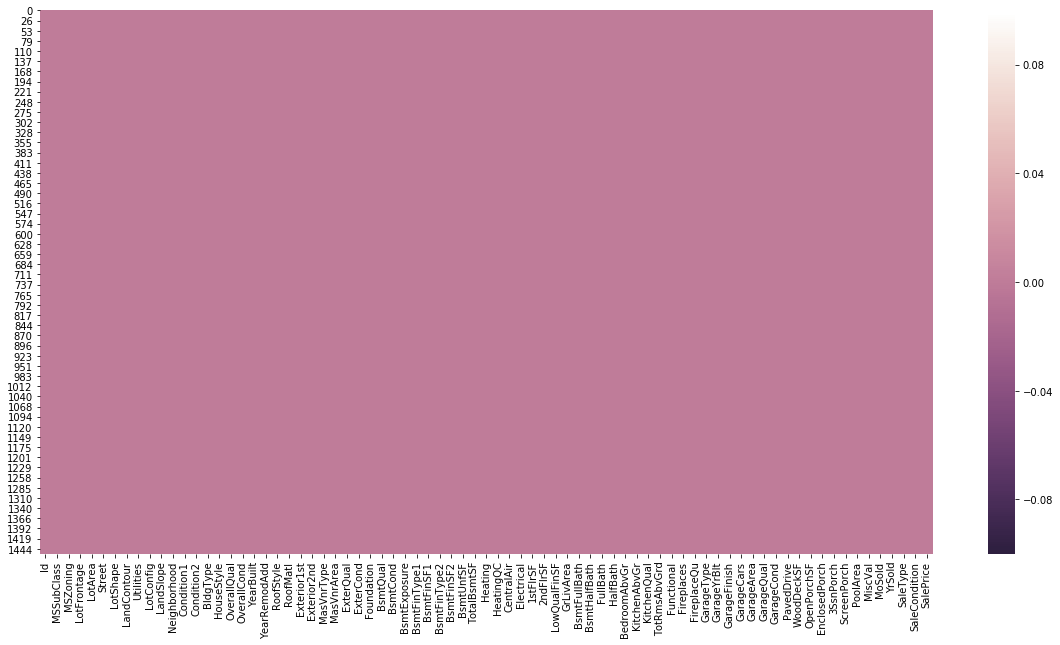

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap)

### Start of Visualization

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

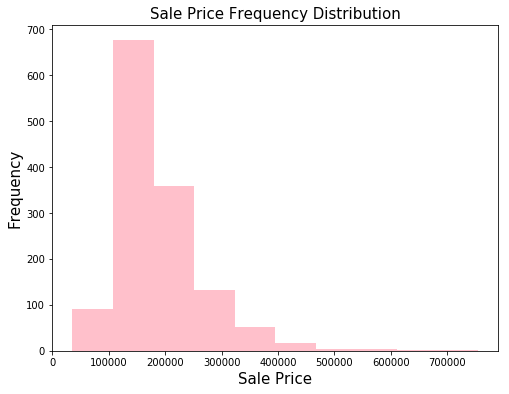

In [13]:
# Sale Price Frequency Distribution
plt.figure(figsize=(8,6))
plt.xlabel("Sale Price", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Sale Price Frequency Distribution", fontsize=15)
plt.hist(housepricesdata["SalePrice"], color= "pink")
plt.show()

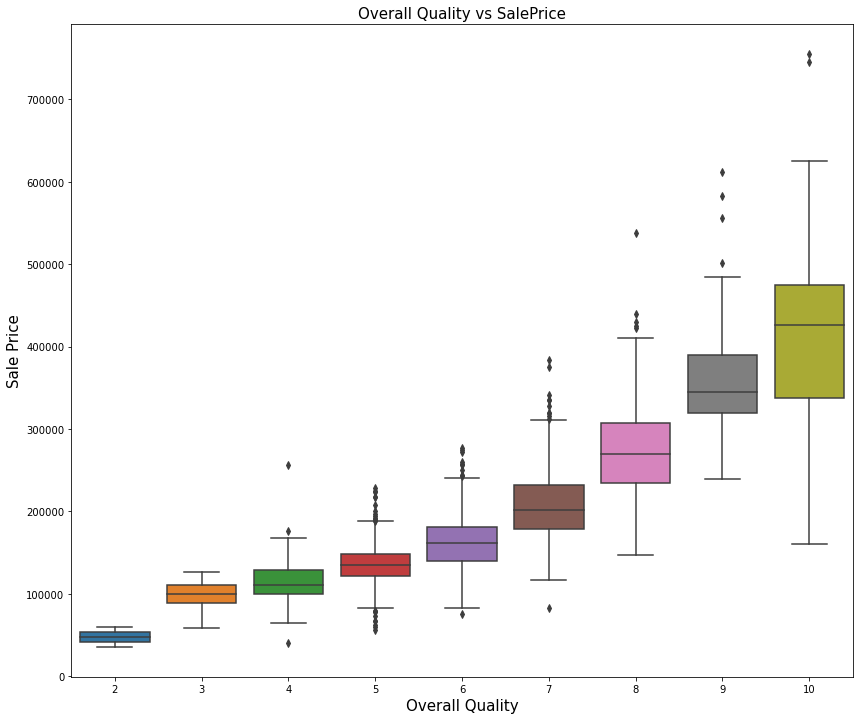

In [16]:
# Boxplot of OverallQuality and SalePrice
plt.figure(figsize=(14,12))
sns.boxplot(y="SalePrice", x="OverallQual", data= housepricesdata)
plt.title("Overall Quality vs SalePrice", fontsize=15)
plt.xlabel("Overall Quality", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.show()

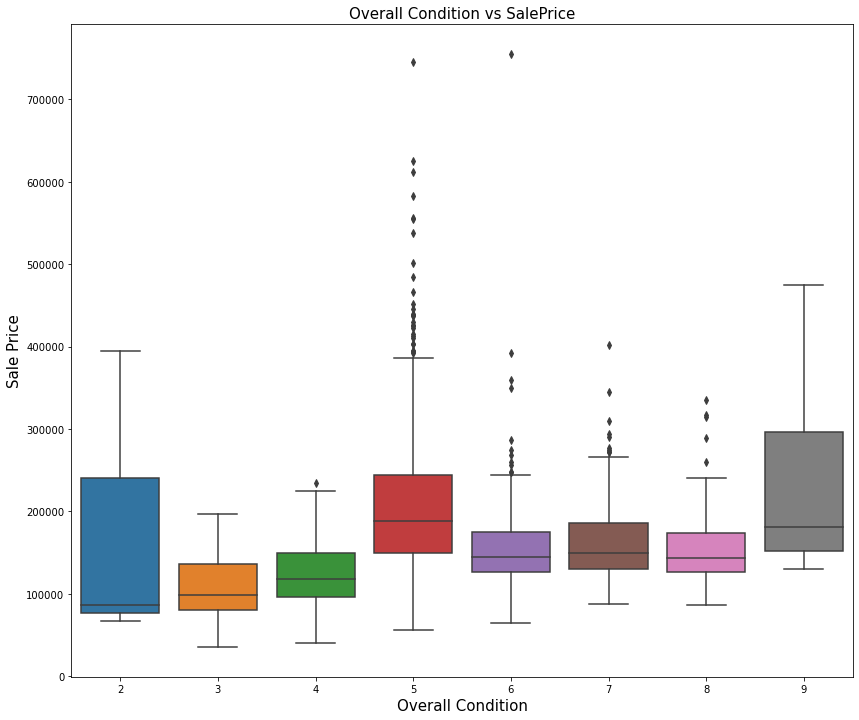

In [15]:
# Boxplot of OverallQuality and SalePrice
plt.figure(figsize=(14,12))
sns.boxplot(y="SalePrice", x="OverallCond", data= housepricesdata)
plt.title("Overall Condition vs SalePrice", fontsize=15)
plt.xlabel("Overall Condition", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.show()

In [11]:
import numpy as np
import seaborn as sns

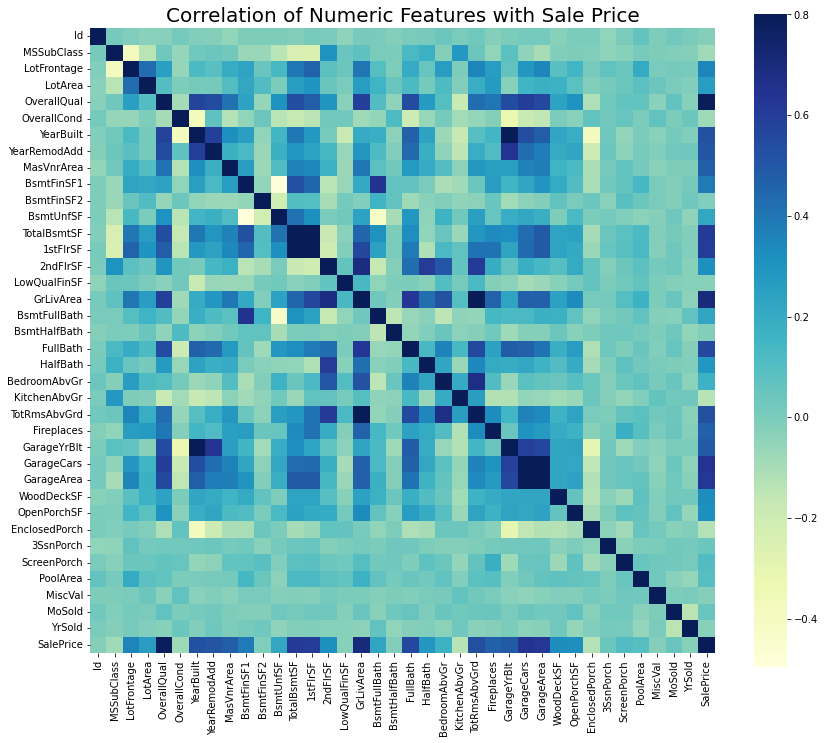

In [12]:
# Get correlation of numeric variables
numeric_features= housepricesdata.select_dtypes(include= [np.number])

correlation= numeric_features.corr()
correlation["SalePrice"].sort_values(ascending=False)*100
# Correlation Heat Map (Seaborn library)
f, ax= plt.subplots(figsize=(14,12))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=20)
sns.heatmap(correlation, square= True, vmax=0.8, cmap="YlGnBu")
plt.show()

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


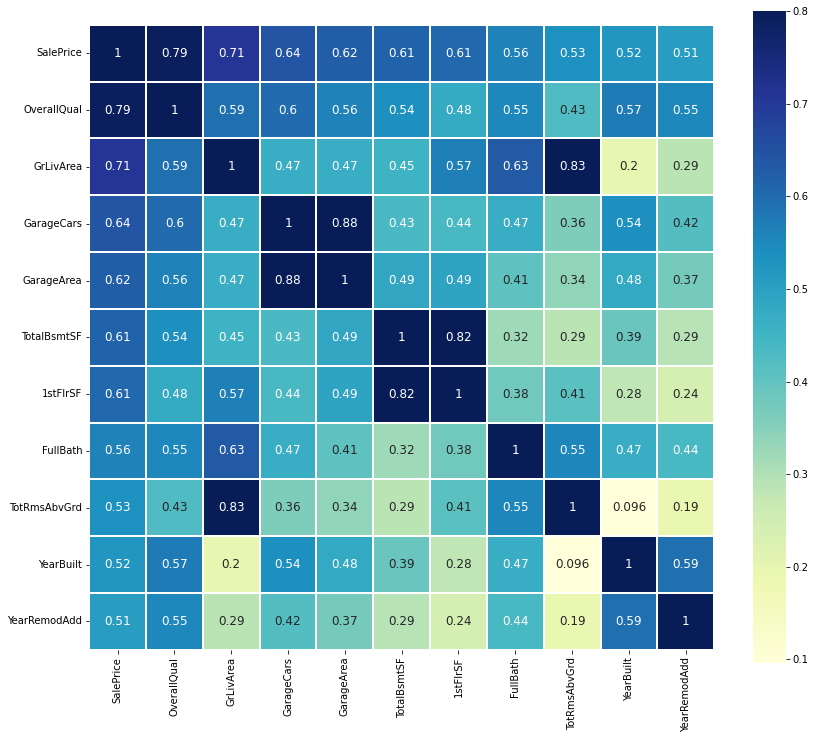

In [13]:
# Zoomed Heat Map
k= 11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(housepricesdata[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

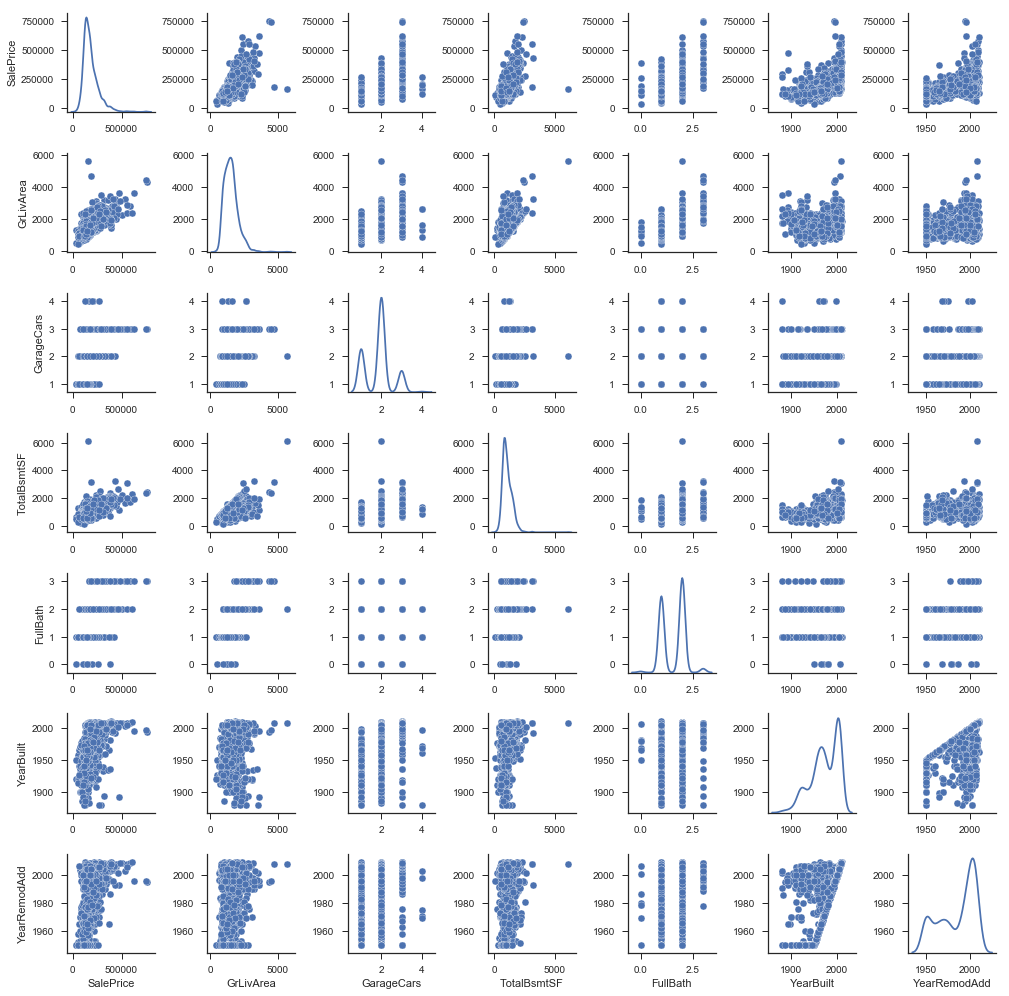

In [18]:
# Pairplot of numeric variables
# Pairplot of numeric variable
sns.set(style="ticks", color_codes=True)
columns= ["SalePrice", "GrLivArea", "GarageCars", "TotalBsmtSF","FullBath","YearBuilt", "YearRemodAdd"]
sns.pairplot(housepricesdata[columns], size=2, kind= "scatter", diag_kind="kde")
plt.show()

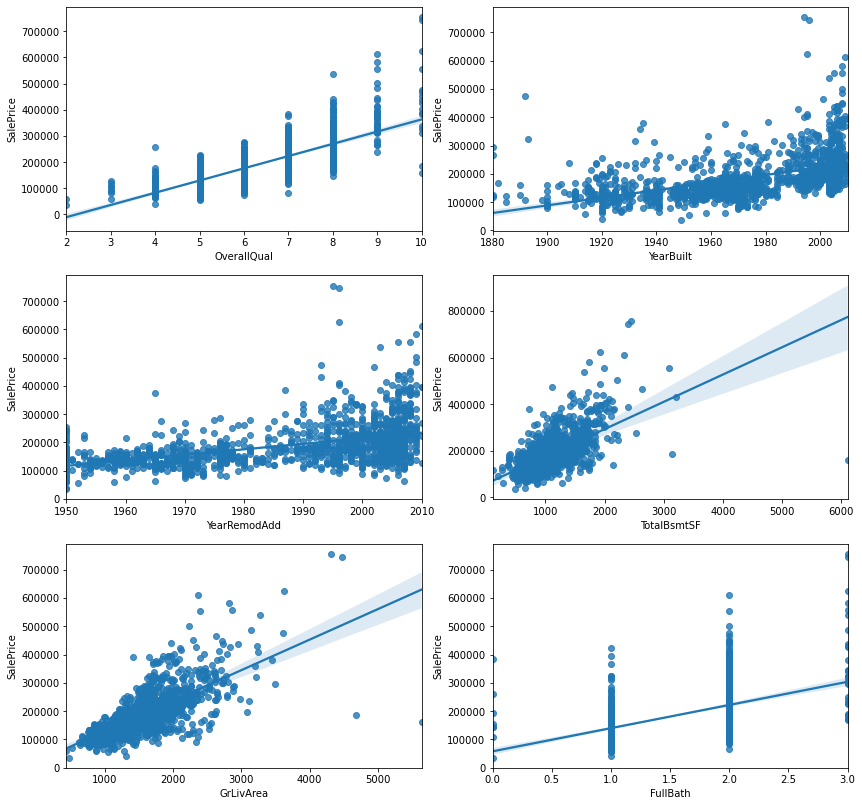

In [18]:
# Get the correlation plot of numeric variable with the target variable
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6))= plt.subplots(nrows=3, ncols=2, figsize=(14,14))

sns.regplot(x=housepricesdata["OverallQual"], y=housepricesdata["SalePrice"], scatter= True, fit_reg= True, ax=ax1)

sns.regplot(x=housepricesdata["YearBuilt"], y=housepricesdata["SalePrice"], scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x=housepricesdata["YearRemodAdd"], y=housepricesdata["SalePrice"], scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x=housepricesdata["TotalBsmtSF"], y=housepricesdata["SalePrice"], scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x=housepricesdata["GrLivArea"], y=housepricesdata["SalePrice"], scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x=housepricesdata["FullBath"], y=housepricesdata["SalePrice"], scatter=True, fit_reg=True, ax=ax6)

# sns.regplot(x=train["GarageCars"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax7)

plt.show()
